In [10]:
# === IMPORTS ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import joblib
from add_preprocessing import load_and_prepare_data, create_preprocessor

# === LOAD & PREPARE DATA ===
X, y = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
preprocessor = create_preprocessor(X)

# === BUILD MODEL PIPELINE ===
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

# === TRAIN-TEST SPLIT & TRAINING ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# === EXPORT MODEL ===
joblib.dump(model, "../models/gradient_boosting_model.pkl")
print("✅ Gradient Boosting model trained and saved as '../models/gradient_boosting_model.pkl'")

/Users/alper/Desktop/cse2600/model_codes/add_preprocessing.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Gradient Boosting model trained and saved as '../models/gradient_boosting_model.pkl'


✅ Gradient Boosting Model Evaluation
------------------------------
Accuracy: 0.845104447918147
ROC AUC Score: 0.8377670669810773

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.31      0.45      4361
           1       0.85      0.98      0.91     16750

    accuracy                           0.85     21111
   macro avg       0.84      0.65      0.68     21111
weighted avg       0.84      0.85      0.82     21111



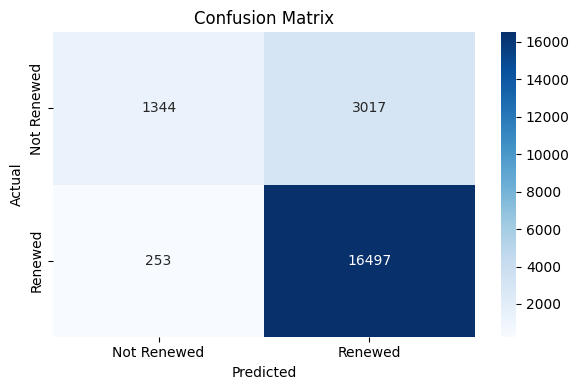

In [11]:
# === IMPORTS ===
import joblib
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# === LOAD SAVED GRADIENT BOOSTING MODEL ===
model = joblib.load("../models/gradient_boosting_model.pkl")

# === PREDICT ON TEST SET ===
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

# === EVALUATE MODEL PERFORMANCE ===
print("✅ Gradient Boosting Model Evaluation")
print("-" * 30)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === DISPLAY CONFUSION MATRIX ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Renewed', 'Renewed'], yticklabels=['Not Renewed', 'Renewed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()